# Statistical and visual analysis of the textile trade network

## Data exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
textile = pd.read_csv('wto_data_textile.csv')

In [3]:
textile

,Indicator Category,Indicator Code,Indicator,Reporting Economy Code,Reporting Economy ISO3A Code,Reporting Economy,Partner Economy Code,Partner Economy ISO3A Code,Partner Economy,Product/Sector Classification Code,...,Period,Frequency Code,Frequency,Unit Code,Unit,Year,Value Flag Code,Value Flag,Text Value,Value
0,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",8,ALB,Albania,4,AFG,Afghanistan,HS,...,Annual,A,Annual,USD,US$,2009,NaN,NaN,NaN,1280.000000
1,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",8,ALB,Albania,4,AFG,Afghanistan,HS,...,Annual,A,Annual,USD,US$,2016,NaN,NaN,NaN,555.675171
2,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",8,ALB,Albania,4,AFG,Afghanistan,HS,...,Annual,A,Annual,USD,US$,2018,NaN,NaN,NaN,44878.987899
3,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",8,ALB,Albania,4,AFG,Afghanistan,HS,...,Annual,A,Annual,USD,US$,2018,NaN,NaN,NaN,1370.498161
4,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",8,ALB,Albania,4,AFG,Afghanistan,HS,...,Annual,A,Annual,USD,US$,2012,NaN,NaN,NaN,2735.277534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061847,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",894,ZMB,Zambia,862,VEN,"Venezuela, Bolivarian Republic of",HS,...,Annual,A,Annual,USD,US$,2005,NaN,NaN,NaN,4792.566820
1061848,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",894,ZMB,Zambia,882,WSM,Samoa,HS,...,Annual,A,Annual,USD,US$,2012,NaN,NaN,NaN,14830.501500
1061849,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",894,ZMB,Zambia,892,SRB,Serbia,HS,...,Annual,A,Annual,USD,US$,2012,NaN,NaN,NaN,92.395000
1061850,Bilateral imports,HS_M_0010,"Bilateral imports by detailed HS codes (2,4,6 ...",894,ZMB,Zambia,892,SRB,Serbia,HS,...,Annual,A,Annual,USD,US$,2012,NaN,NaN,NaN,38.833500


In [4]:
# aggregating the sectors to obtain a single value for each ordered pair of countries

aggregated_textile = textile.groupby(['Reporting Economy ISO3A Code', 'Partner Economy ISO3A Code', 'Year'])['Value'].sum().reset_index()
aggregated_textile.head(20)

,Reporting Economy ISO3A Code,Partner Economy ISO3A Code,Year,Value
0,AGO,AFG,2014,44.67
1,AGO,ALB,2014,919.00
2,AGO,ARE,2014,15370713.83
3,AGO,ARG,2014,69249.34
4,AGO,ATG,2014,2239.23
5,AGO,AUS,2014,1261629.82
6,AGO,AUT,2014,13508.32
7,AGO,AZE,2014,2754.90
8,AGO,BDI,2014,1215.25
9,AGO,BEL,2014,6903558.92


In [5]:
# creating a weighted directed graph for each year

yearly_graphs = {}

years = sorted(aggregated_textile['Year'].unique())
for year in years:
    year_df = aggregated_textile[aggregated_textile['Year'] == year]
    g = nx.DiGraph()
    for _, row in year_df.iterrows():
        reporting_country = row['Reporting Economy ISO3A Code']
        partner_country = row['Partner Economy ISO3A Code']
        import_value = row['Value']
        g.add_edge(reporting_country, partner_country, weight=import_value)
    
    yearly_graphs[year] = g

In [9]:
# adding the continent each economy belongs to as node attribute

region_df = pd.read_csv('country_region.csv')
region_df

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [10]:
iso_to_region = dict(zip(region_df['alpha-3'], region_df['region']))

In [11]:
for year, g in yearly_graphs.items():
    for node in g.nodes():
        iso = node
        region = iso_to_region.get(iso, 'Unknown')
        g.nodes[node]['region'] = region
        print(f'Node: {iso}, Region: {region}')

Node: ALB, Region: Europe
Node: ARE, Region: Asia
Node: AUT, Region: Europe
Node: BEL, Region: Europe
Node: BGR, Region: Europe
Node: BRB, Region: Americas
Node: CAN, Region: Americas
Node: CHE, Region: Europe
Node: CHN, Region: Asia
Node: COL, Region: Americas
Node: CZE, Region: Europe
Node: DEU, Region: Europe
Node: DNK, Region: Europe
Node: EGY, Region: Africa
Node: ESP, Region: Europe
Node: FRA, Region: Europe
Node: GBR, Region: Europe
Node: GEO, Region: Asia
Node: GRC, Region: Europe
Node: HKG, Region: Asia
Node: HRV, Region: Europe
Node: HUN, Region: Europe
Node: IND, Region: Asia
Node: IRL, Region: Europe
Node: IRN, Region: Asia
Node: ISR, Region: Asia
Node: ITA, Region: Europe
Node: JPN, Region: Asia
Node: KOR, Region: Asia
Node: MKD, Region: Europe
Node: MLT, Region: Europe
Node: MMR, Region: Asia
Node: NLD, Region: Europe
Node: NOR, Region: Europe
Node: POL, Region: Europe
Node: PRT, Region: Europe
Node: ROM, Region: Unknown
Node: RUS, Region: Europe
Node: SAU, Region: Asia
N

Node: SVN, Region: Europe
Node: SWE, Region: Europe
Node: SYR, Region: Asia
Node: THA, Region: Asia
Node: TUN, Region: Africa
Node: TUR, Region: Asia
Node: TZA, Region: Africa
Node: UKR, Region: Europe
Node: USA, Region: Americas
Node: VCT, Region: Americas
Node: VNM, Region: Asia
Node: AGO, Region: Africa
Node: ARM, Region: Asia
Node: AZE, Region: Asia
Node: BHR, Region: Asia
Node: BLR, Region: Europe
Node: BRB, Region: Americas
Node: BTN, Region: Asia
Node: CRI, Region: Americas
Node: DOM, Region: Americas
Node: ETH, Region: Africa
Node: GEO, Region: Asia
Node: GTM, Region: Americas
Node: HTI, Region: Americas
Node: IRQ, Region: Asia
Node: ISL, Region: Europe
Node: JAM, Region: Americas
Node: JOR, Region: Asia
Node: KAZ, Region: Asia
Node: KWT, Region: Asia
Node: LAO, Region: Asia
Node: LBY, Region: Africa
Node: LSO, Region: Africa
Node: LTU, Region: Europe
Node: MDG, Region: Africa
Node: MDV, Region: Asia
Node: MOZ, Region: Africa
Node: MUS, Region: Africa
Node: MWI, Region: Africa


Node: SLE, Region: Africa
Node: SLV, Region: Americas
Node: SRB, Region: Europe
Node: SUR, Region: Americas
Node: SVK, Region: Europe
Node: SVN, Region: Europe
Node: SWE, Region: Europe
Node: THA, Region: Asia
Node: TJK, Region: Asia
Node: TUN, Region: Africa
Node: TUR, Region: Asia
Node: UKR, Region: Europe
Node: USA, Region: Americas
Node: UZB, Region: Asia
Node: VCT, Region: Americas
Node: VEN, Region: Americas
Node: VNM, Region: Asia
Node: ZAF, Region: Africa
Node: ARG, Region: Americas
Node: BOL, Region: Americas
Node: CRI, Region: Americas
Node: DOM, Region: Americas
Node: ECU, Region: Americas
Node: EST, Region: Europe
Node: LSO, Region: Africa
Node: PRY, Region: Americas
Node: TZA, Region: Africa
Node: URY, Region: Americas
Node: CYP, Region: Asia
Node: GHA, Region: Africa
Node: KGZ, Region: Asia
Node: KNA, Region: Americas
Node: SYR, Region: Asia
Node: TKM, Region: Asia
Node: ZWE, Region: Africa
Node: AGO, Region: Africa
Node: AZE, Region: Asia
Node: BDI, Region: Africa
Node: 

In [12]:
# checking which nodes have been assigned an Unknown region

unknown_regions = [] 

for year, g in yearly_graphs.items():
    for node in g.nodes():
        region = g.nodes[node].get('region', 'Unknown')
        if region == 'Unknown':
            if node not in unknown_regions:
                unknown_regions.append(node)

unknown_regions

['ROM', 'CHT']

In [13]:
# manually assigning the region to the Unknown values

for year, g in yearly_graphs.items():
    g.nodes['CHT']['region'] = 'Asia'
    g.nodes['ROM']['region'] = 'Europe'

In [14]:
for year, g in yearly_graphs.items():
    for node in g.nodes():
        if 'region' in g.nodes[node]:
            region = g.nodes[node]['region']
            print(f'Node: {node}, Region: {region}')

Node: ALB, Region: Europe
Node: ARE, Region: Asia
Node: AUT, Region: Europe
Node: BEL, Region: Europe
Node: BGR, Region: Europe
Node: BRB, Region: Americas
Node: CAN, Region: Americas
Node: CHE, Region: Europe
Node: CHN, Region: Asia
Node: COL, Region: Americas
Node: CZE, Region: Europe
Node: DEU, Region: Europe
Node: DNK, Region: Europe
Node: EGY, Region: Africa
Node: ESP, Region: Europe
Node: FRA, Region: Europe
Node: GBR, Region: Europe
Node: GEO, Region: Asia
Node: GRC, Region: Europe
Node: HKG, Region: Asia
Node: HRV, Region: Europe
Node: HUN, Region: Europe
Node: IND, Region: Asia
Node: IRL, Region: Europe
Node: IRN, Region: Asia
Node: ISR, Region: Asia
Node: ITA, Region: Europe
Node: JPN, Region: Asia
Node: KOR, Region: Asia
Node: MKD, Region: Europe
Node: MLT, Region: Europe
Node: MMR, Region: Asia
Node: NLD, Region: Europe
Node: NOR, Region: Europe
Node: POL, Region: Europe
Node: PRT, Region: Europe
Node: ROM, Region: Europe
Node: RUS, Region: Europe
Node: SAU, Region: Asia
No

Node: GIN, Region: Africa
Node: BLZ, Region: Americas
Node: TCD, Region: Africa
Node: BWA, Region: Africa
Node: MOZ, Region: Africa
Node: CAF, Region: Africa
Node: SLB, Region: Oceania
Node: SYC, Region: Africa
Node: VUT, Region: Oceania
Node: VAT, Region: Europe
Node: GNQ, Region: Africa
Node: ALB, Region: Europe
Node: AFG, Region: Asia
Node: ARE, Region: Asia
Node: ARG, Region: Americas
Node: AUS, Region: Oceania
Node: AUT, Region: Europe
Node: BEL, Region: Europe
Node: BGD, Region: Asia
Node: BGR, Region: Europe
Node: BHS, Region: Americas
Node: BIH, Region: Europe
Node: BRA, Region: Americas
Node: BRN, Region: Asia
Node: CAN, Region: Americas
Node: CHE, Region: Europe
Node: CHL, Region: Americas
Node: CHN, Region: Asia
Node: CHT, Region: Asia
Node: CMR, Region: Africa
Node: COG, Region: Africa
Node: COL, Region: Americas
Node: CYP, Region: Asia
Node: CZE, Region: Europe
Node: DEU, Region: Europe
Node: DNK, Region: Europe
Node: EGY, Region: Africa
Node: ESP, Region: Europe
Node: EST

Node: GTM, Region: Americas
Node: HND, Region: Americas
Node: JOR, Region: Asia
Node: LUX, Region: Europe
Node: MAC, Region: Asia
Node: MDG, Region: Africa
Node: MLT, Region: Europe
Node: MRT, Region: Africa
Node: MUS, Region: Africa
Node: NPL, Region: Asia
Node: NZL, Region: Oceania
Node: PRY, Region: Americas
Node: SGP, Region: Asia
Node: SLV, Region: Americas
Node: URY, Region: Americas
Node: UZB, Region: Asia
Node: AZE, Region: Asia
Node: BEN, Region: Africa
Node: BHR, Region: Asia
Node: EST, Region: Europe
Node: GRD, Region: Americas
Node: HTI, Region: Americas
Node: IRQ, Region: Asia
Node: JAM, Region: Americas
Node: KAZ, Region: Asia
Node: KEN, Region: Africa
Node: KGZ, Region: Asia
Node: MDV, Region: Asia
Node: NER, Region: Africa
Node: OMN, Region: Asia
Node: PAN, Region: Americas
Node: QAT, Region: Asia
Node: SWZ, Region: Africa
Node: TJK, Region: Asia
Node: TLS, Region: Asia
Node: UGA, Region: Africa
Node: ZMB, Region: Africa
Node: ATG, Region: Americas
Node: AND, Region: Eu

Node: MNG, Region: Asia
Node: MOZ, Region: Africa
Node: MRT, Region: Africa
Node: MUS, Region: Africa
Node: MWI, Region: Africa
Node: MYS, Region: Asia
Node: NAM, Region: Africa
Node: NER, Region: Africa
Node: NGA, Region: Africa
Node: NIC, Region: Americas
Node: NLD, Region: Europe
Node: NOR, Region: Europe
Node: NPL, Region: Asia
Node: NZL, Region: Oceania
Node: OMN, Region: Asia
Node: PAK, Region: Asia
Node: PAN, Region: Americas
Node: PER, Region: Americas
Node: PHL, Region: Asia
Node: PNG, Region: Oceania
Node: POL, Region: Europe
Node: PRT, Region: Europe
Node: PRY, Region: Americas
Node: ROM, Region: Europe
Node: RUS, Region: Europe
Node: RWA, Region: Africa
Node: SAU, Region: Asia
Node: SDN, Region: Africa
Node: SEN, Region: Africa
Node: SGP, Region: Asia
Node: SLB, Region: Oceania
Node: SLE, Region: Africa
Node: SLV, Region: Americas
Node: SRB, Region: Europe
Node: SUR, Region: Americas
Node: SVK, Region: Europe
Node: SVN, Region: Europe
Node: SWE, Region: Europe
Node: SYC, Re

Node: CAF, Region: Africa
Node: CUB, Region: Americas
Node: GRD, Region: Americas
Node: KNA, Region: Americas
Node: LBR, Region: Africa
Node: YEM, Region: Asia
Node: LIE, Region: Europe
Node: CUW, Region: Americas
Node: LCA, Region: Americas
Node: VCT, Region: Americas
Node: TLS, Region: Asia
Node: VAT, Region: Europe
Node: GNQ, Region: Africa
Node: GNB, Region: Africa


In [15]:
# counting the yearly observations

observations = aggregated_textile['Year'].value_counts()
observations

2011    10178
2010    10086
2012    10070
2009     9835
2014     9743
2013     9697
2007     9559
2015     9521
2008     9451
2006     9194
2016     8929
2001     8834
2005     8578
2017     8569
2004     8374
2002     8353
2003     8224
2019     7925
2018     7893
2000     7255
2020     5941
2021     4140
Name: Year, dtype: int64

In [17]:
# finding the number of reporting economies

len(aggregated_textile['Reporting Economy ISO3A Code'].unique())

138

In [18]:
# finding the number of partner economies

len(aggregated_textile['Partner Economy ISO3A Code'].unique())

188

In [19]:
# finding the total number of nodes each year

for year, g in yearly_graphs.items():
    number_nodes = len(list(g.nodes))
    print(f'Number of nodes in {year}: {number_nodes}')

Number of nodes in 2000: 183
Number of nodes in 2001: 183
Number of nodes in 2002: 183
Number of nodes in 2003: 184
Number of nodes in 2004: 184
Number of nodes in 2005: 184
Number of nodes in 2006: 185
Number of nodes in 2007: 186
Number of nodes in 2008: 185
Number of nodes in 2009: 185
Number of nodes in 2010: 186
Number of nodes in 2011: 187
Number of nodes in 2012: 188
Number of nodes in 2013: 188
Number of nodes in 2014: 188
Number of nodes in 2015: 188
Number of nodes in 2016: 188
Number of nodes in 2017: 188
Number of nodes in 2018: 188
Number of nodes in 2019: 188
Number of nodes in 2020: 187
Number of nodes in 2021: 188


### Finding average value and average degree for each year

In [20]:
# calculating the average value of imports each year

average_values = aggregated_textile.groupby('Year')['Value'].mean()
average_values

Year
2000    2.830323e+07
2001    2.478149e+07
2002    2.558723e+07
2003    2.799416e+07
2004    3.030063e+07
2005    3.135125e+07
2006    3.084472e+07
2007    3.188853e+07
2008    3.340184e+07
2009    2.775810e+07
2010    3.190431e+07
2011    3.695572e+07
2012    3.519930e+07
2013    3.669456e+07
2014    3.650477e+07
2015    3.746905e+07
2016    3.688789e+07
2017    3.980692e+07
2018    4.397897e+07
2019    4.334469e+07
2020    5.828816e+07
2021    6.593715e+07
Name: Value, dtype: float64

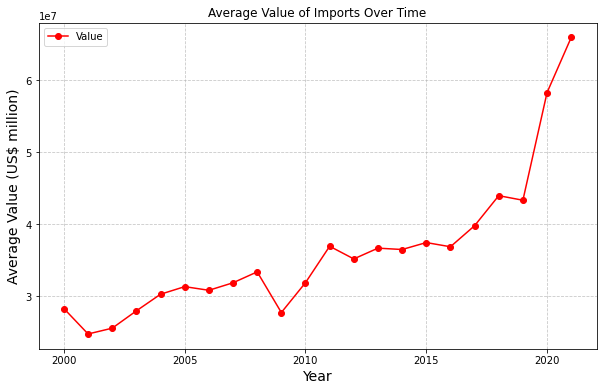

In [21]:
# plotting the average values

plt.figure(figsize=(10, 6))
average_values.plot(kind='line', marker='o', color = 'red')
plt.title('Average Value of Imports Over Time')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Value (US$ million)', fontsize = 14)
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

In [22]:
# filtering the dataset to obtain only the years 2010-2021

start_year = 2010
end_year = 2021

filtered_textile = aggregated_textile[(aggregated_textile['Year'] >= start_year) & (aggregated_textile['Year'] <= end_year)]

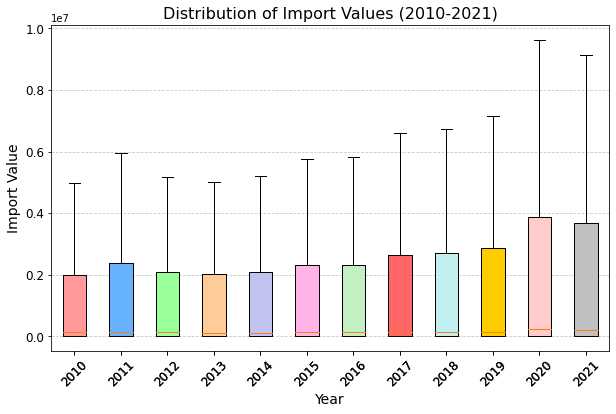

In [23]:
# plotting the box plots for the values from 2010

plt.figure(figsize=(10, 6))
plt.boxplot([group['Value'] for year, group in filtered_textile.groupby('Year')],
            labels=[str(year) for year in range(start_year, end_year + 1)],
            showfliers=False, patch_artist=True)

box_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', 
              '#FF6666', '#c2f0f0', '#FFCC00', '#ffcccb', '#c0c0c0']
box_plot = plt.boxplot([group['Value'] for year, group in filtered_textile.groupby('Year')],
                       labels=[str(year) for year in range(start_year, end_year + 1)],
                       showfliers=False, patch_artist=True)

for patch, color in zip(box_plot['boxes'], box_colors):
    patch.set_facecolor(color)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Import Value', fontsize=14)
plt.title('Distribution of Import Values (2010-2021)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# calculating the average degree for each year

average_degrees = {}

for year, g in yearly_graphs.items():
    degrees = dict(g.degree())
    num_nodes = len(g.nodes())
    total_degree = sum(degrees.values())
    average_degree = total_degree / num_nodes
    average_degrees[year] = average_degree
    
for year, avg_degree in average_degrees.items():
    print(f'{year}: {avg_degree}')

2000: 79.2896174863388
2001: 96.5464480874317
2002: 91.2896174863388
2003: 89.3913043478261
2004: 91.02173913043478
2005: 93.23913043478261
2006: 99.3945945945946
2007: 102.78494623655914
2008: 102.17297297297297
2009: 106.32432432432432
2010: 108.45161290322581
2011: 108.85561497326204
2012: 107.12765957446808
2013: 103.15957446808511
2014: 103.64893617021276
2015: 101.2872340425532
2016: 94.98936170212765
2017: 91.15957446808511
2018: 83.96808510638297
2019: 84.30851063829788
2020: 63.54010695187166
2021: 44.04255319148936


In [25]:
# calculating the average weighted degree each year

average_w_degrees = {}

for year, g in yearly_graphs.items():
    w_degrees = dict(g.degree(weight = 'weight'))
    num_nodes = len(g.nodes())
    total_w_degree = sum(degrees.values())
    average_w_degree = total_w_degree / num_nodes
    average_w_degrees[year] = average_w_degree
    
for year, avg_w_degree in average_w_degrees.items():
    print(f'{year}: {avg_w_degree}')

2000: 45.24590163934426
2001: 45.24590163934426
2002: 45.24590163934426
2003: 45.0
2004: 45.0
2005: 45.0
2006: 44.75675675675676
2007: 44.516129032258064
2008: 44.75675675675676
2009: 44.75675675675676
2010: 44.516129032258064
2011: 44.27807486631016
2012: 44.04255319148936
2013: 44.04255319148936
2014: 44.04255319148936
2015: 44.04255319148936
2016: 44.04255319148936
2017: 44.04255319148936
2018: 44.04255319148936
2019: 44.04255319148936
2020: 44.27807486631016
2021: 44.04255319148936


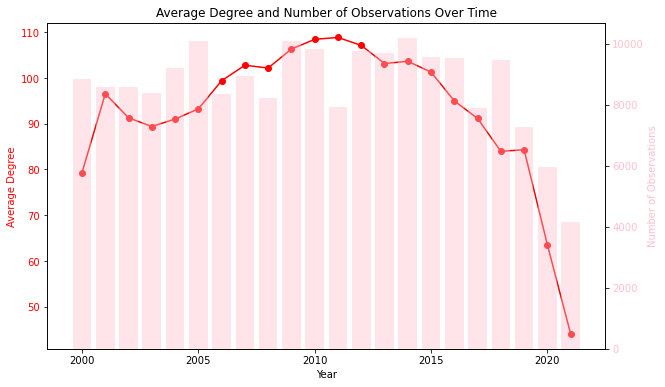

In [51]:
# plotting the average degrees against the yearly observations

years = list(average_degrees.keys())
average_degree_values = list(average_degrees.values())

years_obs = aggregated_textile['Year'].unique()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(years, average_degree_values, marker='o', linestyle='-', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Degree', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.bar(years_obs, observations, color='pink', alpha=0.4)
ax2.set_ylabel('Number of Observations', color='pink')
ax2.tick_params(axis='y', labelcolor='pink')

plt.title('Average Degree and Number of Observations Over Time')
plt.xlabel('Year')
plt.show()

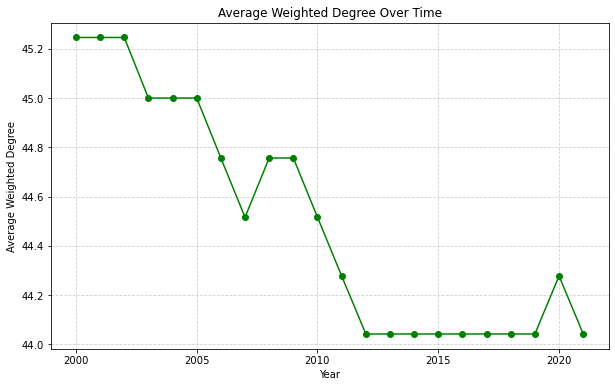

In [27]:
# plotting the average weighted degrees

years = list(average_w_degrees.keys())
average_w_degree_values = list(average_w_degrees.values())

plt.figure(figsize=(10, 6))
plt.plot(years, average_w_degree_values, marker='o', linestyle='-', color = 'green')
plt.title('Average Weighted Degree Over Time')
plt.xlabel('Year')
plt.ylabel('Average Weighted Degree')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

### Finding the top 5 countries each year in term of in-degree and out-degree

In [28]:
# obtaining the top 5 in-degrees and out-degrees each year

top_in_degrees = {}
top_out_degrees = {}

for year, g in yearly_graphs.items():
    in_degrees = dict(g.in_degree())
    out_degrees = dict(g.out_degree())
    top_in_degrees[year] = sorted(in_degrees, key=in_degrees.get, reverse=True)[:5]
    top_out_degrees[year] = sorted(out_degrees, key=out_degrees.get, reverse=True)[:5]

In [29]:
# finding the countries that were in the top 5 in-degrees and out-degrees at least once

in_degree_appearances = {}
out_degree_appearances = {}
total_years = len(yearly_graphs)

for year in yearly_graphs.keys():
    for node in top_in_degrees[year]:
        in_degree_appearances[node] = in_degree_appearances.get(node, 0) + 1
    for node in top_out_degrees[year]:
        out_degree_appearances[node] = out_degree_appearances.get(node, 0) + 1

top_in_degree_countries = [node for node, appearances in in_degree_appearances.items() if appearances > 0]
top_out_degree_countries = [node for node, appearances in out_degree_appearances.items() if appearances > 0]

# finding the percentage of time those countries were in the top 5 over the time period 2000-2021

percentage_in_degree = {node: (in_degree_appearances[node] / total_years) * 100 for node in top_in_degree_countries}
percentage_out_degree = {node: (out_degree_appearances[node] / total_years) * 100 for node in top_out_degree_countries}

sorted_in_degree = sorted(percentage_in_degree.items(), key=lambda x: x[1], reverse=True)
sorted_out_degree = sorted(percentage_out_degree.items(), key=lambda x: x[1], reverse=True)

In [30]:
# creating a function to format the percentage values

def format_percentage(value):
    return f'{value:.2f}%'

In [31]:
# creating a dataframe for the top in-degree and out-degree countries for better readability of results

df_in_degree = pd.DataFrame(sorted_in_degree, columns=['Country', 'In-Degree Percentage'])
df_out_degree = pd.DataFrame(sorted_out_degree, columns=['Country', 'Out-Degree Percentage'])

In [32]:
# printing the top 5 in-degree countries and the percentage of their appearances over time

df_in_degree['In-Degree Percentage'] = df_in_degree['In-Degree Percentage'].apply(format_percentage)
df_in_degree

,Country,In-Degree Percentage
0,CHN,95.45%
1,GBR,77.27%
2,DEU,68.18%
3,FRA,45.45%
4,ITA,40.91%
5,USA,31.82%
6,VNM,18.18%
7,CAN,13.64%
8,IND,13.64%
9,PAK,13.64%


In [33]:
# printing the top 5 out-degree countries and the percentage of their appearances over time

df_out_degree['Out-Degree Percentage'] = df_out_degree['Out-Degree Percentage'].apply(format_percentage)
df_out_degree

,Country,Out-Degree Percentage
0,USA,100.00%
1,CAN,95.45%
2,ZAF,77.27%
3,CHE,50.00%
4,THA,50.00%
5,HKG,40.91%
6,KOR,40.91%
7,POL,18.18%
8,ARE,9.09%
9,GBR,9.09%


In [34]:
# obtaining the top 5 weighted in-degrees and weighted out-degrees each year

top_w_in_degrees = {}
top_w_out_degrees = {}

for year, g in yearly_graphs.items():
    w_in_degrees = dict(g.in_degree(weight = 'weight'))
    w_out_degrees = dict(g.out_degree(weight = 'weight'))
    top_w_in_degrees[year] = sorted(w_in_degrees, key=w_in_degrees.get, reverse=True)[:5]
    top_w_out_degrees[year] = sorted(w_out_degrees, key=w_out_degrees.get, reverse=True)[:5]

In [35]:
# finding the countries that were in the top 5 weighted in-degrees and weighted out-degrees at least once

w_in_degree_appearances = {}
w_out_degree_appearances = {}

for year in yearly_graphs.keys():
    for node in top_w_in_degrees[year]:
        w_in_degree_appearances[node] = w_in_degree_appearances.get(node, 0) + 1
    for node in top_w_out_degrees[year]:
        w_out_degree_appearances[node] = w_out_degree_appearances.get(node, 0) + 1

top_w_in_degree_countries = [node for node, appearances in w_in_degree_appearances.items() if appearances > 0]
top_w_out_degree_countries = [node for node, appearances in w_out_degree_appearances.items() if appearances > 0]

# finding the percentage of time those countries were in the top 5 over the time period 2000-2021

percentage_w_in_degree = {node: (w_in_degree_appearances[node] / total_years) * 100 for node in top_w_in_degree_countries}
percentage_w_out_degree = {node: (w_out_degree_appearances[node] / total_years) * 100 for node in top_w_out_degree_countries}

sorted_w_in_degree = sorted(percentage_w_in_degree.items(), key=lambda x: x[1], reverse=True)
sorted_w_out_degree = sorted(percentage_w_out_degree.items(), key=lambda x: x[1], reverse=True)

In [36]:
# creating a dataframe for the top weighted in-degree and weighted out-degree countries for better readability of results

df_w_in_degree = pd.DataFrame(sorted_w_in_degree, columns=['Country', 'Weighted In-Degree Percentage'])
df_w_out_degree = pd.DataFrame(sorted_w_out_degree, columns=['Country', 'Weighted Out-Degree Percentage'])

In [37]:
# printing the top 5 weighted in-degree countries and the percentage of their appearances over time

df_w_in_degree['Weighted In-Degree Percentage'] = df_w_in_degree['Weighted In-Degree Percentage'].apply(format_percentage)
df_w_in_degree

,Country,Weighted In-Degree Percentage
0,CHN,100.00%
1,USA,90.91%
2,IND,72.73%
3,ITA,63.64%
4,VNM,59.09%
5,CHT,40.91%
6,BGD,31.82%
7,KOR,27.27%
8,MEX,9.09%
9,TUR,4.55%


In [38]:
# printing the top 5 weighted out-degree countries and the percentage of their appearances over time

df_w_out_degree['Weighted Out-Degree Percentage'] = df_w_out_degree['Weighted Out-Degree Percentage'].apply(format_percentage)
df_w_out_degree

,Country,Weighted Out-Degree Percentage
0,USA,100.00%
1,JPN,100.00%
2,HKG,95.45%
3,CHN,90.91%
4,CAN,50.00%
5,KOR,36.36%
6,MEX,18.18%
7,GBR,9.09%


### Finding the degree distribution

In [6]:
# obtaining the data only for 2019

textile19 = aggregated_textile[aggregated_textile['Year'] == 2019]
textile19

,Reporting Economy ISO3A Code,Partner Economy ISO3A Code,Year,Value
1664,ARE,AFG,2019,3.042142e+06
1670,ARE,AGO,2019,3.210000e+02
1680,ARE,ALB,2019,1.582573e+06
1682,ARE,AND,2019,3.097000e+03
1692,ARE,ARG,2019,9.048900e+04
...,...,...,...,...
190280,ZWE,TZA,2019,1.647333e+06
190311,ZWE,USA,2019,8.698133e+05
190319,ZWE,VNM,2019,1.794020e+02
190334,ZWE,ZAF,2019,2.810614e+07


In [7]:
# creating a weighted directed graph for 2019

g_19 = nx.DiGraph()
for index, row in textile19.iterrows():
    origin = row['Reporting Economy ISO3A Code']
    destination = row['Partner Economy ISO3A Code']
    weight = row['Value']
    g_19.add_weighted_edges_from([(origin, destination, weight)])

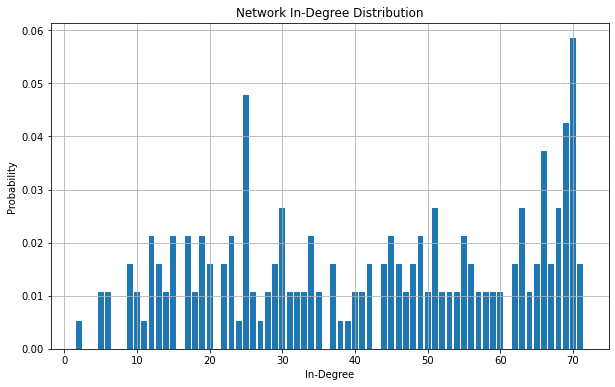

In [61]:
# obtaining and plotting network in-degree distribution in 2019

in_degree_sequence = list(dict(g_19.in_degree()).values())
in_degree_counts = {in_degree: in_degree_sequence.count(in_degree) for in_degree in set(in_degree_sequence)}
total_nodes = len(g_19.nodes())

in_degree_distribution = {in_degree: count / total_nodes for in_degree, count in in_degree_counts.items()}
in_degrees = list(in_degree_distribution.keys())
in_probabilities = list(in_degree_distribution.values())

plt.figure(figsize=(10, 6))
plt.bar(in_degrees, in_probabilities)
plt.xlabel("In-Degree")
plt.ylabel("Probability")
plt.title("Network In-Degree Distribution")
plt.grid(True)
plt.show()

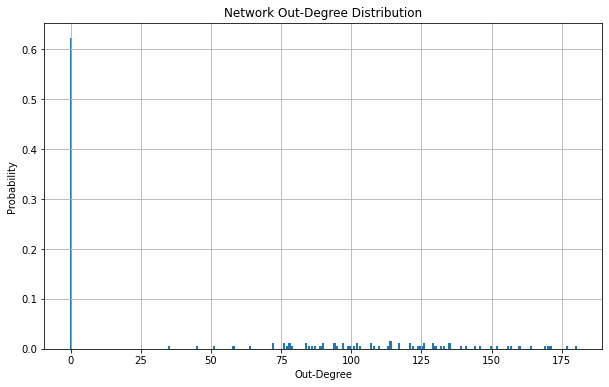

In [62]:
# obtaining and plotting network out-degree distribution in 2019

out_degree_sequence = list(dict(g_19.out_degree()).values())
out_degree_counts = {out_degree: out_degree_sequence.count(out_degree) for out_degree in set(out_degree_sequence)}
out_degree_distribution = {out_degree: count / total_nodes for out_degree, count in out_degree_counts.items()}

out_degrees = list(out_degree_distribution.keys())
out_probabilities = list(out_degree_distribution.values())

plt.figure(figsize=(10, 6))
plt.bar(out_degrees, out_probabilities)
plt.xlabel("Out-Degree")
plt.ylabel("Probability")
plt.title("Network Out-Degree Distribution")
plt.grid(True)
plt.show()

### Assortativity - to check for homophily employing the regions

In [52]:
# finding the assortativity values for the network each year

assortativity_results = {}

for year, g in yearly_graphs.items():
    assortativity = nx.attribute_assortativity_coefficient(g, 'region')
    assortativity_results[year] = assortativity

In [53]:
# displaying the assortativity results

assortativity_df = pd.DataFrame(list(assortativity_results.items()), columns=['Year', 'Assortativity'])
assortativity_df

,Year,Assortativity
0,2000,0.074039
1,2001,0.077184
2,2002,0.074366
3,2003,0.078887
4,2004,0.073576
5,2005,0.076701
6,2006,0.071903
7,2007,0.077315
8,2008,0.069231
9,2009,0.072481


### Average clustering coefficient each year and small world

In [55]:
# finding the average clustering coefficient each year

avg_clustering_coeffs = []

for year, g in yearly_graphs.items():
    avg_clustering = nx.average_clustering(g)
    avg_clustering_coeffs.append(avg_clustering)
    print(f'Year {year}: {avg_clustering}')

Year 2000: 0.6758991235234061
Year 2001: 0.6555027734377704
Year 2002: 0.6430712208623085
Year 2003: 0.6254191462900675
Year 2004: 0.637316904112599
Year 2005: 0.6257952490901084
Year 2006: 0.6266800027455878
Year 2007: 0.6284514245447224
Year 2008: 0.6478089518393793
Year 2009: 0.640202348707671
Year 2010: 0.6437866230553764
Year 2011: 0.6431235847314641
Year 2012: 0.6293264496564186
Year 2013: 0.6274359365772136
Year 2014: 0.6271171883458061
Year 2015: 0.6366791142746964
Year 2016: 0.6553321038240015
Year 2017: 0.6879088102610675
Year 2018: 0.6825466883093984
Year 2019: 0.6941581854514064
Year 2020: 0.757433436496581
Year 2021: 0.7812403456335021


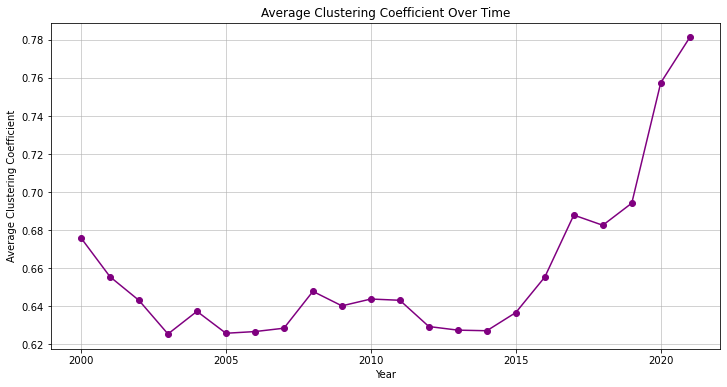

In [56]:
# plotting the average clustering coefficient over time

plt.figure(figsize=(12, 6))
plt.plot(years, avg_clustering_coeffs, marker='o', linestyle='-', color = 'purple')
plt.xlabel('Year')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient Over Time')
plt.grid(True, alpha = 0.7)
plt.show()

### Density and sparsity

In [172]:
# finding the density of the network each year

densities = []

for year, g in yearly_graphs.items():
    density = nx.density(g)
    densities.append(density)
    print(f'Year {year}: {density}')

Year 2000: 0.21782861946796372
Year 2001: 0.26523749474569147
Year 2002: 0.2507956524349967
Year 2003: 0.2442385364694702
Year 2004: 0.24869327631266333
Year 2005: 0.25475172249940603
Year 2006: 0.2700940070505288
Year 2007: 0.2777971519907004
Year 2008: 0.2776439482961222
Year 2009: 0.28892479435957696
Year 2010: 0.2931124673060157
Year 2011: 0.29262262089586566
Year 2012: 0.2864375924451018
Year 2013: 0.2758277392194789
Year 2014: 0.27713619296848335
Year 2015: 0.270821481397201
Year 2016: 0.25398225054044826
Year 2017: 0.2437421777221527
Year 2018: 0.22451359654113096
Year 2019: 0.22542382523609056
Year 2020: 0.17080673911793456
Year 2021: 0.11776083741039936


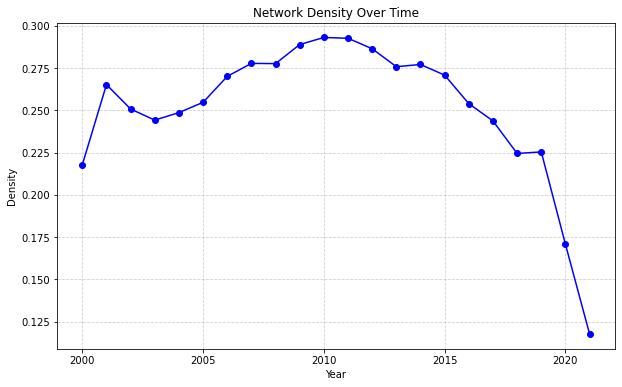

In [176]:
# plotting the density over time

years = list(yearly_graphs.keys())

# Plot the density values over time
plt.figure(figsize=(10, 6))
plt.plot(years, densities, marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Density")
plt.title("Network Density Over Time")
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

## Network visualization - force directed algorithm

In [63]:
# obtaining the top 10 trade partners for each node in 2019

sorted_df = textile19.sort_values(by=['Reporting Economy ISO3A Code', 'Value'], ascending=[True, False])

top10_df = sorted_df.groupby('Reporting Economy ISO3A Code').head(10).reset_index(drop=True)
top10_df.head(20)

,Reporting Economy ISO3A Code,Partner Economy ISO3A Code,Year,Value
0,ARE,CHN,2019,1.628263e+09
1,ARE,IND,2019,7.135973e+08
2,ARE,ITA,2019,2.930316e+08
3,ARE,TUR,2019,2.617565e+08
4,ARE,BGD,2019,1.796167e+08
5,ARE,IDN,2019,1.486757e+08
6,ARE,PAK,2019,1.291766e+08
7,ARE,VNM,2019,1.291025e+08
8,ARE,KOR,2019,1.077633e+08
9,ARE,JPN,2019,9.970582e+07


In [66]:
# creating a weighted directed graph for the data obtained

g_top = nx.DiGraph()

for index, row in top10_df.iterrows():
    origin = row['Reporting Economy ISO3A Code']
    destination = row['Partner Economy ISO3A Code']
    weight = row['Value']
    g_top.add_edges_from([(origin, destination)])

In [110]:
# appling force-directed placement to get node positions and mapping the size of nodes to their out-degrees

pos = nx.spring_layout(g_top, iterations=200, k = 2.0)
list_degree = list(g_top.out_degree())
nodes , degree = map(list, zip(*list_degree))

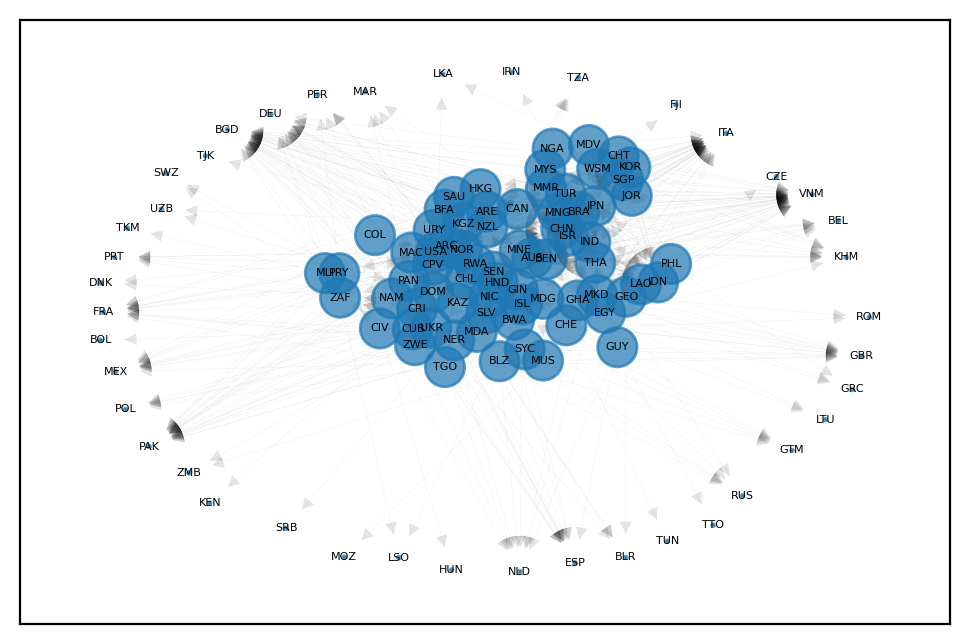

In [111]:
# plotting the node positions obtained with force-directed algorithm

plt.rcParams['figure.dpi'] = 200
nx.draw_networkx_edges(g_top, pos, width=0.1, alpha=0.1)
nx.draw_networkx_nodes(g_top, pos, node_size=[(v * 20)+1 for v in degree], alpha=0.7)
labels = {node: node for node in g_top.nodes()}
nx.draw_networkx_labels(g_top, pos, labels, font_size=4)
plt.show()

## Generating an edge list and an adjacency matrix to be used with latentnet and greed

In [ ]:
# obtaining the edge list for the network data in 2019, using the g_19 graph created before - to be used in latentnet

edge_list = nx.to_pandas_edgelist(g_19)

In [ ]:
# exporting the edge list to a csv file

edge_list.to_csv('g_19_edge_list.csv', index=False)

In [152]:
# creating the adjacency matrix for the top 20 exchanges for each country - to be used in greed

reporting_nodes = np.unique(top20_df['Reporting Economy ISO3A Code'])
partner_nodes = np.unique(top20_df['Partner Economy ISO3A Code'])
all_nodes = np.unique(np.concatenate((reporting_nodes, partner_nodes)))

num_nodes = len(all_nodes)
adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

for index, row in top20_df.iterrows():
    source_node = row['Reporting Economy ISO3A Code']
    target_node = row['Partner Economy ISO3A Code']

    source_idx = np.where(all_nodes == source_node)[0][0]
    target_idx = np.where(all_nodes == target_node)[0][0]

    adjacency_matrix[source_idx, target_idx] = 1

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 1 0]]


In [153]:
# exporting the adjacency matrix to a csv file

adjacency_df = pd.DataFrame(adjacency_matrix)
adjacency_df.to_csv('adjacency_matrix_20.csv', index_label=True)